# Digit Recognition

Let's say we want to develop a model to recognize digits (for example, if we see ![image](picOf2.png) then we probably want our model to *output* the number 2). Most of machine learning relies on the idea that we can *train* models using data. For this demo, we'll be training our model on a dataset called [MNIST](http://yann.lecun.com/exdb/mnist/). To get started with the actual coding, we're going to need some **import** statements. These are very similar to Java's imports!

In [1]:
import pandas as pd              # used for getting dataframe
import matplotlib.pyplot as plt  # used for plotting
import numpy as np               # used for random selection at the end

'''
CONSTANTS
'''
NUM_EPOCHS = 300      # number of iterations we want to run through the data
NUM_TRAIN = 40000     # number of training samples
NUM_TEST_IMAGES = 10  # number of test visualization images

The next thing we're going to need to do is get the data from our files. To do this, we're going to use the **pandas** library we imported above!

In [2]:
dataframe = pd.read_csv("train.csv")

Awesome! Now, let's try to print out the data to see what it looks like...

In [3]:
print(dataframe)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

Now we're going to need to import some machine learning libraries. For this demo, we'll be using Pytorch, a popular framework for machine learning in Python.

In [4]:
import torch

It's finally time to build a model!

In [16]:
# here, we use inheritance in Python (DigitRecognizer extends torch.nn.Module)
class DigitRecognizer(torch.nn.Module):

    # self is like the 'this' keyword in Java
    def __init__(self):
        '''
        This method is our constructor!
        '''
        
        super().__init__()
        
        #    syntax:   torch.nn.Linear(input dimensions, output dimensions)
        self.linear1 = torch.nn.Linear(784, 100)
        self.linear2 = torch.nn.Linear(100, 10)
        
    
    def forward(self, x):
        '''
        This method is how we "process" the input x to get the output y
        '''
        first_layer_output = self.linear1(x)
        final_output = self.linear2(first_layer_output)
        
        return final_output

Before all else, let's instantiate the model. In Python, the syntax for instantiating classes looks like:

In [12]:
model = DigitRecognizer()

The next step is to actually *train* the model. This is where our dataframe is going to come in handy! The actual training process here involves something called [backpropagation](https://en.wikipedia.org/wiki/Backpropagation); for our purposes, this is how we minimize the error (or *loss*) in our model's predictions.

In [13]:
# used to keep track of error (or loss)
loss_fn = torch.nn.CrossEntropyLoss()

# used to perform backpropagation
optimizer = torch.optim.Adam(model.parameters())

# let's split data into input (or x) and label (or y) after preprocessing
x, y = torch.tensor(dataframe.loc[:, dataframe.columns != "label"].to_numpy(),
                    dtype=torch.float32), torch.tensor(dataframe["label"])

# split x and y into train / test
x_train, y_train = x[:NUM_TRAIN], y[:NUM_TRAIN]
x_test, y_test = x[NUM_TRAIN:], y[NUM_TRAIN:]


'''
TRAINING THE MODEL
'''
for i in range(NUM_EPOCHS):
    optimizer.zero_grad()
    
    # get the model's prediction based on the input data
    y_pred = model(x_train)
    
    # compute loss of prediction
    loss = loss_fn(y_pred, y_train)
    
    # compute gradient for all weights based on prediction
    loss.backward()
    
    # backpropagate the gradients for all weights
    optimizer.step()
    
    if (i % 100 == 0):
        print("Training error (loss) at epoch %d:" % i, loss.item())
        print()

Training error (loss) at epoch 0: 77.60816955566406

Training error (loss) at epoch 100: 2.2094473838806152

Training error (loss) at epoch 200: 1.2152860164642334



Woohoo! Our model has been trained and the loss hopefully looks pretty low. Now comes the fun part: let's predict on some *test* data (for our purposes, test data is data that looks similar to the training data we just used except that we don't train on the test data; in practice, we'd want to also think about the distribution of our data and be very careful to avoid a problem called [data leaking](https://machinelearningmastery.com/data-leakage-machine-learning/)).

In [14]:
y_pred = model(x_test)
loss = loss_fn(y_pred, y_test)

print("Test error (loss):", loss.item())

Test error (loss): 1.6141208410263062


Not bad, considering that our model had never directly seen this data before! To better discern the quality of the predictions, let's try visualizing them.

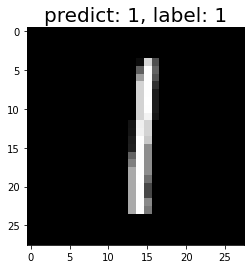

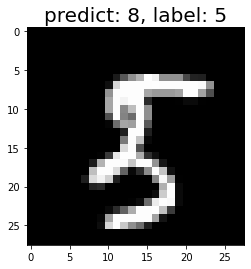

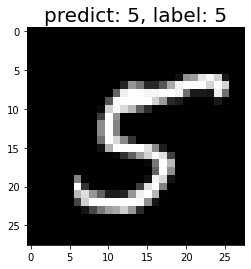

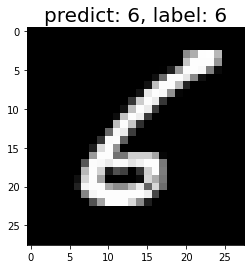

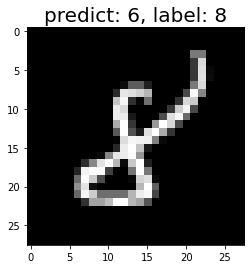

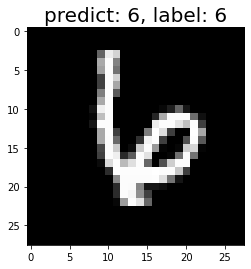

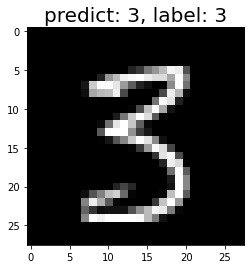

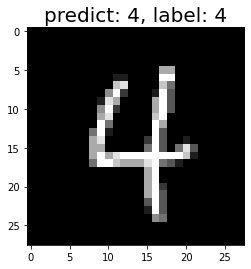

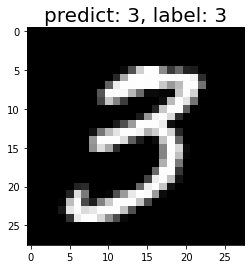

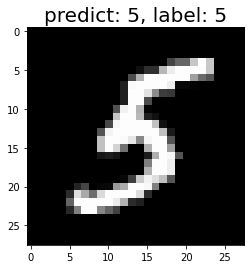

In [15]:
# randomize inputs so that we can see different visualizations
random_idxs = np.random.choice(np.arange(len(x_test)), size=NUM_TEST_IMAGES, replace=False)
x_test_random = x_test[random_idxs]
y_test_random = y_test[random_idxs]

for i in range(NUM_TEST_IMAGES):
    # reshape row data into a 28x28 image (2-dimensional array)
    x_img = x_test_random[i].reshape((28, 28))
    y_pred = np.argmax(model(x_test_random[i]).detach().numpy())

    # plot
    plt.title('predict: %d, label: %d' % (y_pred, y_test_random[i]), fontsize=20)
    plt.imshow(x_img, cmap='gray')
    plt.show()

Yay! These hopefully look pretty convincing! That's all for now, feel free to experiment with the code : -)